# NO2 Trends in Bolivia

In [1]:
import pandas as pd
from acled_conflict_analysis import processing
from acled_conflict_analysis import visuals
import ast
import json
import geopandas as gpd
from shapely.geometry import Point
#import dask_geopandas as dgpd
#import dask.dataframe as dd

import glob

In [14]:
from airpollutionpy import downloadgcs
import os

bucket_name = "datalab-air-pollution"
prefix = 'BOL/ADM1/'
output_folder = os.path.abspath("../../data/airpollution/adm1/raw/monthly/")

os.makedirs(output_folder, exist_ok=True)

downloadgcs.download_bucket_files(bucket_name, output_folder=output_folder, prefix=prefix)

Found 64 files in bucket
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly
c:\User

In [ ]:
import glob
import pandas as pd
import os # Import the os module

# Assuming 'output_folder' is defined elsewhere in your code, e.g.:
# output_folder = "path/to/your/csv_files" 

files = glob.glob(output_folder + "/*.csv")

final_df = pd.DataFrame()

for file in files:
    if os.path.getsize(file) > 0:  # Check if file is not empty
        try:
            df = pd.read_csv(file)
            df['start_date'] = pd.to_datetime(df['start_date'])
            # df['year'] = df['date'].dt.year # Uncomment if needed
            # df['month'] = df['date'].dt.month # Uncomment if needed
            df.drop(columns=['system:index', '.geo'], inplace=True)
            final_df = pd.concat([final_df, df], ignore_index=True)
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file}")
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    else:
        print(f"Skipping empty file: {file}")

# These operations should ideally be performed once after all files are processed
if not final_df.empty:
    final_df.fillna(0, inplace=True)
    final_df.drop_duplicates(inplace=True)

final_df.rename(columns={'start_date': 'date', 'NO2_column_number_density_mean_mean':'NO2_mean'},inplace=True)
final_df[['ADM0_ES', 'ADM0_PCODE','ADM1_ES','date', 'end_date', 'NO2_mean']].to_csv('../../data/air_pollution/bol_adm1_monthly_no2_201901_202412.csv')

Skipping empty file: c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly\bol_adm1_monthly_no2_Beni_2018.csv
Skipping empty file: c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly\bol_adm1_monthly_no2_Chuquisaca_2018.csv
Skipping empty file: c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly\bol_adm1_monthly_no2_Cochabamba_2018.csv
Skipping empty file: c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly\bol_adm1_monthly_no2_La Paz_2018.csv
Skipping empty file: c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly\bol_adm1_monthly_no2_Oruro_2018.csv
Skipping empty file: c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly\bol_adm1_monthly_no2_Pando_2018.csv
Skipping empty file: c:\Users\wb588851\Documents\bolivia-economic-monitor\data\airpollution\adm1\raw\monthly\bol_adm1_mo

In [65]:
bolivia_adm0 = gpd.read_file('../../data/boundaries/BOL_ADM0_gbOpen.geojson')
bolivia_adm1 = gpd.read_file('../../data/boundaries/BOL_ADM1_gbOpen.geojson')

In [40]:
import pandas as pd
%load_ext autoreload
%autoreload 2

from air_pollution_utils import *#get_monthly_baseline_pc_change, process_air_pollution_data, get_annual_baseline_pc_change

air_pollution_monthly_adm0, air_pollution_annual_adm0 = process_air_pollution_data(
    file_path='../../data/air_pollution/bol_adm0_monthly_no2_201901_202506.csv',
    adm_level = 0,
    metric_column = 'NO2_mean',
    baseline_types = ['PY', 2019],
    date_col = 'start_date',
    output_date_col = 'date',
    country_name = None,
    lang_suffix= '_ES' 
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Processing data for ADM level 0 (suffix: _ES) ---
  Calculating monthly changes for NO2_mean...
  Monthly processing complete.
  Aggregating to annual data for NO2_mean...
  Calculating annual changes for NO2_mean...
  Annual processing complete.
--- Processing for ADM level 0 (suffix: _ES) finished ---


**There was a significant increase in air pollution in Bolivia in 2024. This could be because of the widespread forest fires in the country.** 2023 also saw a drop in NO2. That was the year that Bolivia started to experience fuel shortages. There is ongoing, and existing research that indicates that NO2 could be a proxy for congestion activity. However, at a national level it is difficult to isolate the cause for the decline. 

In [ ]:
import bokeh
from bokeh.core.validation.warnings import EMPTY_LAYOUT, MISSING_RENDERERS
from bokeh.io import output_notebook, show
from bokeh.models import Span
import pandas as pd
from bokeh.plotting import figure
from bokeh.models import Panel, Tabs, TabPanel
bokeh.core.validation.silence(MISSING_RENDERERS, True)


output_notebook()

# Grouping and calculating the monthly mean by aoi
df = air_pollution_monthly_adm0.copy()
df = df.sort_values(by='date')
df = df[df['date']<'2025-01-01']

# Group by year and calculate the yearly average NO2
df['year'] = pd.DatetimeIndex(df['date']).year

yearly_avg = air_pollution_annual_adm0
yearly_avg = yearly_avg[yearly_avg['date'] < '2025-01-01']

tabs = []
labels = ['Monthly National Air Pollution', '% Change in Air Pollution compared to 2019', '% Change in Air Pollution Compared to Previous Year']

for idx, measure in enumerate(['NO2_mean', 'percent_change_NO2_mean_2019', 'percent_change_NO2_mean_PY']):
    # Get the line plot for monthly NO2
    p = visuals.get_line_plot(
                df,
                labels[idx],
                "Source: Sentinel 5-P extracted from Google Earth Engine",
                subtitle = "",
                category = 'ADM0_ES',
                measure=measure,
                event_date='date',
    )

    # # Add a line for yearly averages
    # # Assuming you have a way to map the 'year' values to a datetime format for the x-axis in the plot
    p.children[1].line(x=pd.to_datetime(yearly_avg['date'].dt.year, format='%Y'), y=yearly_avg[measure], 
        line_width=2, color='red', legend_label=f'Yearly Average {measure}')
    
    tab = TabPanel(child=p, title=measure)
    tabs.append(tab)

# Show the plot with both the monthly and yearly average lines
tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)


Loading BokehJS ...

In [ ]:
from air_pollution_utils import process_air_pollution_data

air_pollution_monthly_adm1, air_pollution_annual_adm1 = process_air_pollution_data(
    file_path='../../data/air_pollution/bol_adm1_monthly_no2_201901_202412.csv',
    adm_level = 1,
    metric_column = 'NO2_mean',
    baseline_types = ['PY', 2019],
    date_col = 'start_date',
    output_date_col = 'date',
    country_name = None,
    lang_suffix= '_ES' 
)

--- Processing data for ADM level 1 (suffix: _ES) ---
  Calculating monthly changes for NO2_mean...
  Monthly processing complete.
  Aggregating to annual data for NO2_mean...
  Calculating annual changes for NO2_mean...
  Annual processing complete.
--- Processing for ADM level 1 (suffix: _ES) finished ---


In [72]:
from visuals import * 

create_regional_pollution_tabs(
    data_df=air_pollution_annual_adm1,
    temporal_granularity='Annual'
)

Loading BokehJS ...

**Santa Cruz saw the highest amount of increase in NO2.** This could also be indicative of forest fires. Santa Cruz was also the largest importer of [petroleum](https://oec.world/en/profile/country/bol). Pando saw a huge drop in 2023, however, it seemed to have low pollution compared to the other regions. Following Pando, La Paz was the highest dip in NO2 in 2023. 

In [74]:
from visuals import * 

create_regional_pollution_tabs(
    data_df=air_pollution_monthly_adm1,
    temporal_granularity='Monthly'
)

Loading BokehJS ...

**September 2024 in Bolivia saw a high amount of political instability and wildfires.** The wildfires began in June but continued into September. Although September sees peak air pollution every year, 2024 seemed exceptionally higher. 

In [67]:
bolivia_adm1.rename(columns={'shapeName': 'ADM1_ES'}, inplace=True)

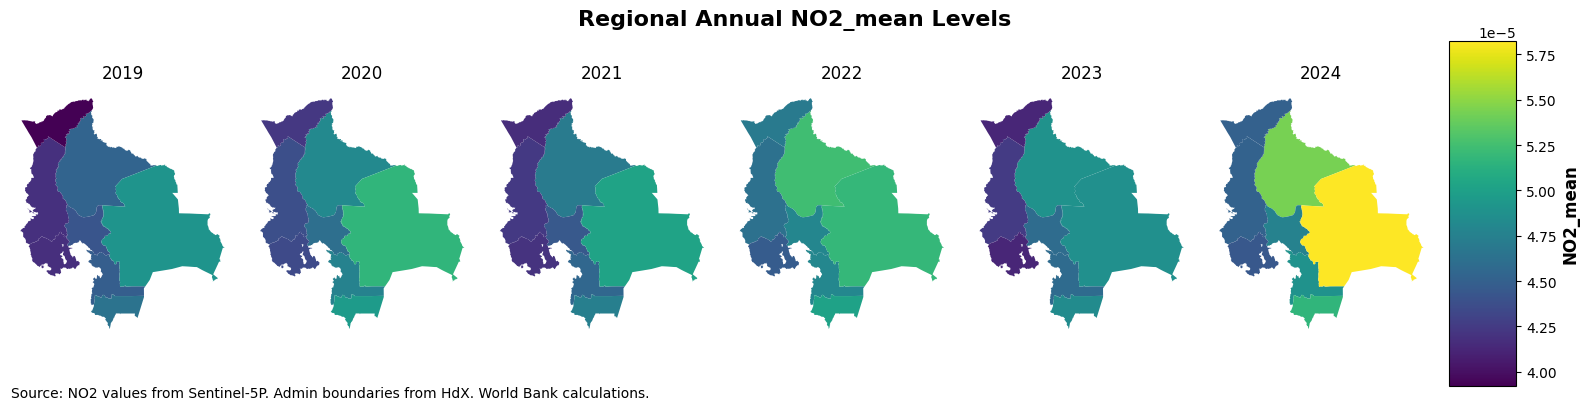

In [ ]:
from visuals import *

fig = plot_regional_timeseries(
    df=air_pollution_annual_adm1, 
    time_column='date',
    variable_column='NO2_mean',
    region_column='ADM1_ES',
    geometry_region_column='ADM1_ES',
    geometry_df=bolivia_adm1, #title = 'NO2 trends at '
)   

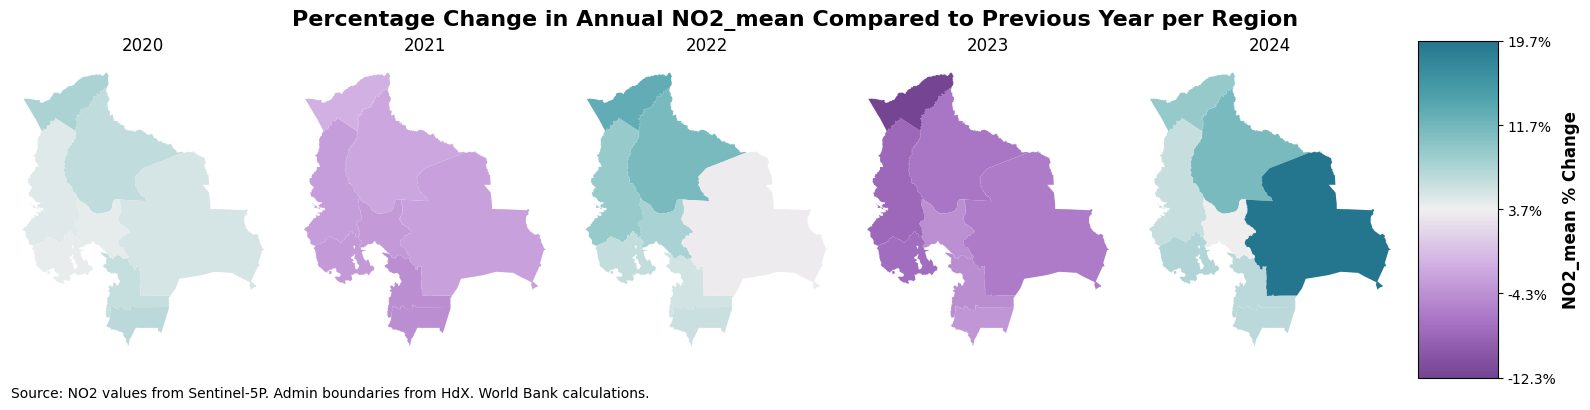

In [82]:
from visuals import *

fig = plot_regional_timeseries(
    df=air_pollution_annual_adm1, 
    time_column='date',
    variable_column='NO2_mean',
    region_column='ADM1_ES',
    geometry_region_column='ADM1_ES',
    geometry_df=bolivia_adm1, #title = 'NO2 trends at ',
    pc_change=True,
    percent_change_column='percent_change_NO2_mean_PY',
    exclude_years=[2019]
)   

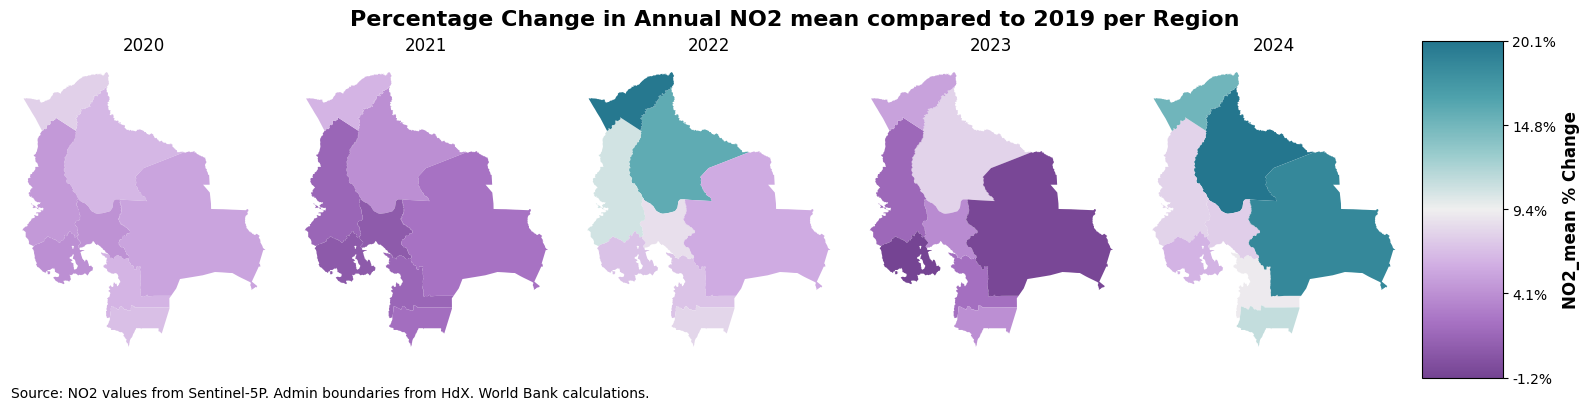

In [84]:
from visuals import *

fig = plot_regional_timeseries(
    df=air_pollution_annual_adm1, 
    time_column='date',
    variable_column='NO2_mean',
    region_column='ADM1_ES',
    geometry_region_column='ADM1_ES',
    geometry_df=bolivia_adm1, #title = 'NO2 trends at ',
    pc_change=True,
    percent_change_column='percent_change_NO2_mean_2019',
    exclude_years=[2019],
    title = 'Percentage Change in Annual NO2 mean compared to 2019 per Region'
)   